<a href="https://colab.research.google.com/github/harikaa-18/stock-market-analysis/blob/main/stockanaylsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.5 MB/s eta 0:00:00


importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.offline as plot
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


initialising training dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TSLA.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


Dispalying first 5 rows

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-07-2010,5.000,5.184,4.054,4.392,4.392,41094000
1,02-07-2010,4.600,4.620,3.742,3.840,3.840,25699000
2,06-07-2010,4.000,4.000,3.166,3.222,3.222,34334500
3,07-07-2010,3.280,3.326,2.996,3.160,3.160,34608500
4,08-07-2010,3.228,3.504,3.114,3.492,3.492,38557000


Dispalying last 5 rows

In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2838,08-10-2021,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,11-10-2021,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,12-10-2021,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,13-10-2021,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
2842,14-10-2021,815.489990,820.250000,813.349976,818.320007,818.320007,12203200


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

<ipython-input-23-b9c6864122be>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [ ]:
print(f'Dataframe conatins stock prices between {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days} days')

Dataframe conatins stock prices between 2010-01-07 00:00:00 2021-12-10 00:00:00
Total days = 4355 days


Describing dataset

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2843.000000,2843.000000,2843.000000,2843.000000,2843.000000,2.843000e+03
mean,105.868475,108.031370,103.555733,105.924597,105.924597,3.141524e+07
std,188.738974,192.483055,184.638617,188.836358,188.836358,2.841880e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,10.698000,11.026000,10.420000,10.727000,10.727000,1.251050e+07
50%,45.874001,46.493999,45.102001,45.916000,45.916000,2.481500e+07
75%,65.021000,66.251999,64.015001,65.275002,65.275002,4.012025e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


plotting box plot

<Axes: >

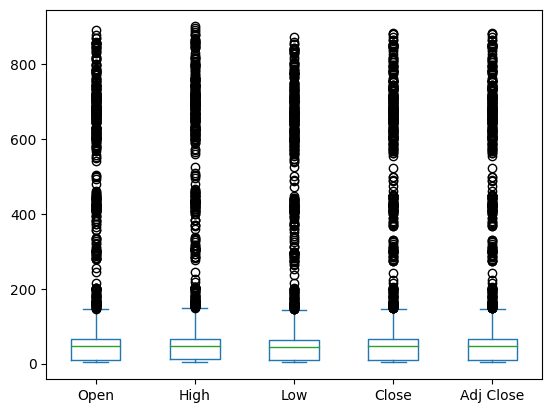

In [ ]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [ ]:
layout = go.Layout(
        title='stock prices of tesla',
        xaxis=dict(
              title='Date',
              titlefont=dict(
                       family='Courier New, monospace',
                       size=18,
                       color='#7f7f7f'
              )
        ),
          yaxis=dict(
              title='Price',
              titlefont=dict(
                       family='Courier New, monospace',
                       size=18,
                       color='#7f7f7f'
              )
        )
)
df_data = [{'x':df['Date'], 'y':df['Close']}]
plot = go.Figure(data=df_data, layout=layout)

plotting stock prices

In [ ]:
iplot(plot)

importing sklearn library

In [ ]:
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=101)

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
print(lm.score(X_test,Y_test))

0.4131373098429034


Setting layout for plot

In [ ]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
df_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=df_data, layout=layout)

In [ ]:
iplot(plot2)

Train and test result


In [ ]:
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust (10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''

print(scores)


Metric           Train                Test        
r2_score  0.41044228972678165	0.4131373098429034
MSE       21136.840352516032	20635.915166425984

